# <div align = center>CIFAR 10:  مجموعة الصور الملونة المصنفة إلى 10 فئات.

<hr>

#1 - المكتبات (Librairies)

In [ ]:
from keras.datasets import cifar10 as DS
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np



```
# This is formatted as code
```

# 2 - البيانات  (Data)

## 2.1 - تحميل البيانات

In [ ]:
(x_train, y_train),(x_test, y_test) = DS.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print("x_train shape =" , x_train.shape)
print("y_train shape =" , y_train.shape)

print("\nx_test shape =" , x_test.shape)
print("y_test shape =" , y_test.shape)

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)

x_test shape = (10000, 32, 32, 3)
y_test shape = (10000, 1)


## 2.2 - عرض عينة من البيانات

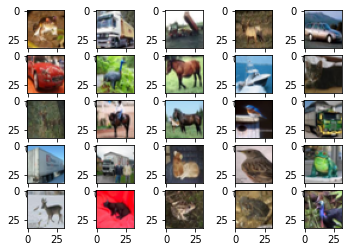

In [ ]:
figure = plt.figure()

for i in range(25):
  figure.add_subplot(5, 5, i+1)
  plt.imshow(x_train[i])

plt.show()

## 2.3 -  تغيير ترميز المخرجات

### 2.3.1 الترميز الأصلي

In [ ]:
print(y_train[0:6])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]]




```
# This is formatted as code
```

### 2.3.1 "One hot encoding"  الترميز 

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0:6])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 2.4 -  تطبيع المدخلات

In [ ]:
print(x_train[0][0][0:6])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]]


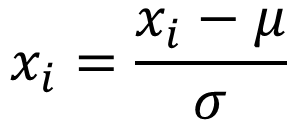

In [ ]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

In [ ]:
print(x_train[0][0][0:6])

[[-0.96192505 -0.91515971 -0.89957127]
 [-1.21134019 -1.16457485 -1.1801633 ]
 [-1.10222107 -1.13339796 -1.21134019]
 [-0.82162904 -1.03986728 -1.22692864]
 [-0.35397565 -0.74368681 -1.07104418]
 [-0.02661829 -0.46309478 -0.89957127]]


# 3- الشبكة العصبية

## 3.1.1 -  النموذج مع تجميع

In [ ]:
model = Sequential([
              Conv2D( 32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32,32,3)),
              MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
              BatchNormalization(),

              Conv2D( 64, (3, 3), padding='valid', activation='relu'),
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),
              BatchNormalization(),

              Conv2D(128, (3, 3), padding='valid', activation='relu'),
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),
              BatchNormalization(),

              Conv2D(256, (3, 3), padding='valid', activation='relu'),
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),
              BatchNormalization(),

              Flatten(),        
                     
              Dense(1025, activation='relu'),
              Dense(512, activation='relu'), 
              Dense(256, activation='relu'), 
              Dense(128, activation='relu'), 
              Dense(10, activation='softmax')

])


## 3.2 -  تركيب النموذج 

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = categorical_crossentropy,
    metrics=['accuracy']
)

## 3.3 - تدريب النموذج



In [ ]:
nb_epochs = 15

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=nb_epochs, verbose=1, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 15s 20ms/step - loss: 1.4326 - accuracy: 0.4859 - val_loss: 1.8859 - val_accuracy: 0.3916
Epoch 2/15
313/313 [==============================] - 5s 17ms/step - loss: 1.0018 - accuracy: 0.6467 - val_loss: 1.0668 - val_accuracy: 0.6444
Epoch 3/15
313/313 [==============================] - 5s 17ms/step - loss: 0.8111 - accuracy: 0.7164 - val_loss: 0.8519 - val_accuracy: 0.7033
Epoch 4/15
313/313 [==============================] - 5s 17ms/step - loss: 0.6757 - accuracy: 0.7633 - val_loss: 0.8298 - val_accuracy: 0.7133
Epoch 5/15
313/313 [==============================] - 6s 18ms/step - loss: 0.5667 - accuracy: 0.8034 - val_loss: 0.7669 - val_accuracy: 0.7494
Epoch 6/15
313/313 [==============================] - 5s 17ms/step - loss: 0.4686 - accuracy: 0.8378 - val_loss: 0.7876 - val_accuracy: 0.7536
Epoch 7/15
313/313 [==============================] - 5s 17ms/step - loss: 0.4002 - accuracy: 0.8616 - val_loss: 0.7729 - val_accuracy: 0.766

## 3.4 -  التقييم


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy = %0.2f" % (acc*100), "%")

313/313 [==============================] - 1s 4ms/step - loss: 1.1228 - accuracy: 0.7607
Accuracy = 76.07 %


## 3.5 -  الرسوم البيانية للتعلم


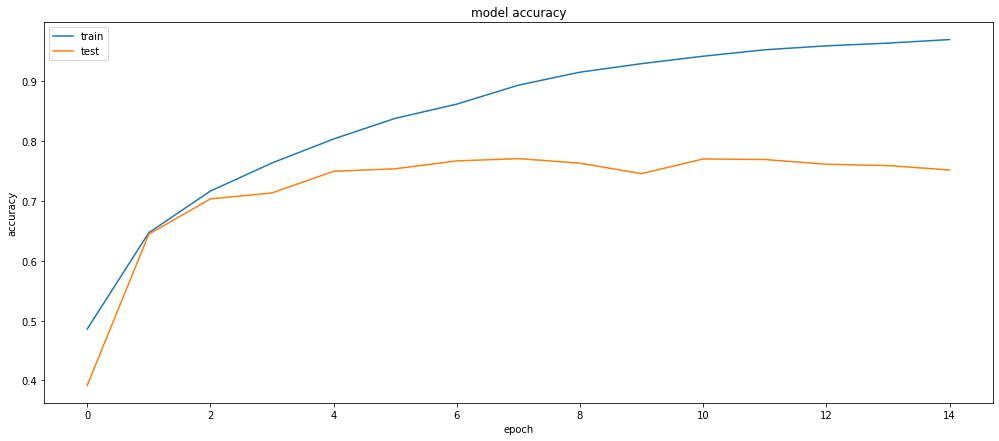

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()

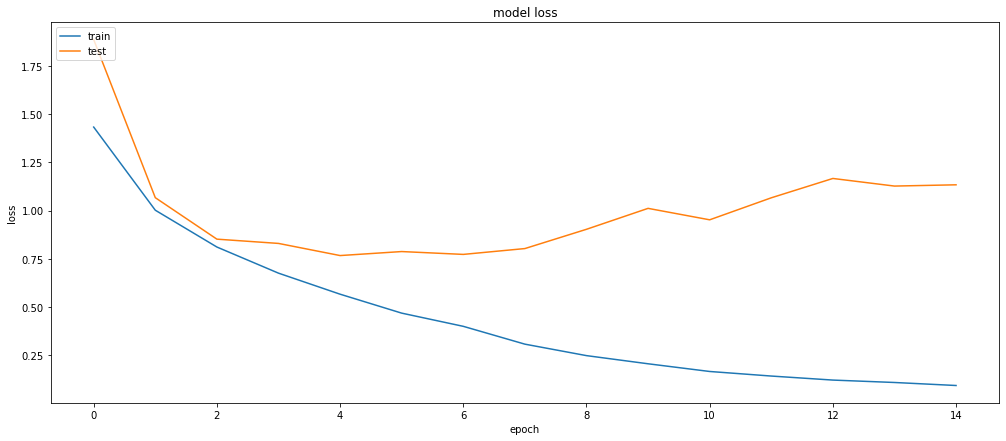

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()